# Maths expertes : graphes et matrices

# Table des matières
**[Chapitre 0 - Introduction](#M0)**  


**[Chapitre 1 - Vocabulaire des graphes](#M1)**  
- [1. Définitions](#M11)
- [2. Première implémentation sous Python](#M12)
- [3. Liste des arêtes](#M13) 
- [4. Une classe de graphes](#M14)
- [5. Chaînes](#M15)
- [6. Graphe connexe](#M16)
- [7. (Exercice 1)](#M17)
  
 
**[Chapitre 2 - Le module NetworkX](#M2)**.   
- [1. Installation et documentation](#M21)  
- [2. Manipuler un graphe](#M22)  
- [3. Les graphes orientés](#M23) 
- [4. Dessiner un graphe](#M24)
- [5. Deux exemples à scruter avec des générateurs de graphe](#M25)
- [6. (Exercice 2) Le karaté club de Zachary](#M26)


**[Chapitre 3 - Chaîne de Markov](#M3)**  
- [1. Définitions](#M31) 
- [2. K "piles" consécutifs](#M32)  
- [3. Temps d'attente dans une file d'attente en tandem](#M33)


**[Chapitre 4 - Résolution de sudoku](#M4)**  
- [1. Représentation des données](#M41) 
- [2. Conversions entre problèmes et grilles](#M42)
- [3. Affichage](#M43)  
- [4. (Exercice 3) Résolution](#M44)  
- [5. Tests](#M45)  
- [6. Derniers doutes levés](#M46)  
- [7. (Exercice 4) Des milliers de grilles ...](#M47)  



## <font color=#3876C2> Chapitre 0 - Introduction</font> <a name="M0"></a>

Les matrices sont étudiées sous divers points de vue : modélisation de problèmes issus des autres disciplines, systèmes linéaires, transformations géométriques. Il s’agit de mettre en valeur l’efficacité du calcul matriciel pour représenter et résoudre des problèmes. 
La notion de graphe est fondamentale pour les mathématiques discrètes et a des applications dans de nombreux domaines. Le programme la fait interagir avec les matrices. Une illustration exemplaire dans le domaine des probabilités, les chaînes de Markov, fait l’objet d’un développement spécifique. 

## <font color=#3876C2> Chapitre 1 - Vocabulaire des graphes</font> <a name="M1"></a>

### <font color=#FEB229> 1. Définitions</font> <a name="M11"></a>

![Vocabulaire](vocabulaire.png)

### <font color=#FEB229> 2. Première implémentation sous Python</font> <a name="M12"></a>

Python n'a pas de type ou de structure de données natives pour les graphes. Cependant les dictionnaires sont idéaux pour représenter des graphes. Le graphe ci-dessous peut être implémenté de la manière suivante

![Exemple](graphe.png)

In [1]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        }

Les clés du dictionnaire ci-dessus sont les sommets de notre graphique. Leurs valeurs sont des listes des sommets qui leur sont connectés par une arête.

### <font color=#FEB229> 3. Liste des arêtes </font> <a name="M13"></a>

Une arête peut être vue comme un tuple avec des nœuds comme éléments, c'est-à-dire ("a", "b").
Voici une fonction qui permet de générer la liste des arêtes :

In [2]:
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

print(generate_edges(graph))

[('a', 'c'), ('b', 'c'), ('b', 'e'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'e'), ('d', 'c'), ('e', 'c'), ('e', 'b')]


Comme nous pouvons le voir, il n'y a pas d'arête contenant le sommet "f". "f" est un sommet isolé de notre graphique.
La fonction Python suivante calcule les sommets isolés d'un graphe donné:

In [3]:
def find_isolated_nodes(graph):
    """ returns a list of isolated nodes. """
    isolated = []
    for node in graph:
        if not graph[node]:
            isolated += node
    return isolated

In [4]:
find_isolated_nodes(graph)

['f']

### <font color=#FEB229> 4. Une classe de graphes </font> <a name="M14"></a>

On peut écrire une implémentation de classe de graphes Python. Si vous regardez la méthode **__init __- vous pouvez constater que nous utilisons un dictionnaire "self .__ graph_dict"** pour stocker les sommets et leurs sommets adjacents correspondants.

In [5]:
""" Une classe Python
Une toute simple classe Python, réalisant l'essentiel 
en ce qui concerne les graphes.
"""


class Graph(object):

    def __init__(self, graph_dict=None):
        """ Initialise un objet Graph 
            Si ce n'est pas un dictionnaire ou None qui est donné, 
            un dictionnaire vide est utilisé
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ retourne les sommets du graphe """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ retourne les arêtes du graphe """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ Si le sommet "vertex" n'est pas dans 
            self.__graph_dict, une clé "vertex" avec une liste vide comme valeur est ajoutée au dictionnaire. 
            Sinon il ne se passe rien. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ vérifie que l'arête est de type set, tuple ou list; 
            entre deux sommets il peut y avoir plusieurs arêtes! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ génère la liste des couples d'arêtes du 
            graphe "graph".
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res
    
    def is_connected(self, 
                     vertices_encountered = None, 
                     start_vertex=None):
        """ détermine si le graphe est connexe """
        if vertices_encountered is None:
            vertices_encountered = set()
        gdict = self.__graph_dict        
        vertices = list(gdict.keys()) # "list" necessary in Python 3 
        if not start_vertex:
            # choose a vertex from graph as a starting point
            start_vertex = vertices[0]
        vertices_encountered.add(start_vertex)
        if len(vertices_encountered) != len(vertices):
            for vertex in gdict[start_vertex]:
                if vertex not in vertices_encountered:
                    if self.is_connected(vertices_encountered, vertex):
                        return True
        else:
            return True
        return False
    
    def find_path(self, start_vertex, end_vertex, path=None):
        """ trouve une chaîne du sommet start_vertex vers end_vertex 
            dans le graphe """
        if path == None:
            path = []
        graph = self.__graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex, 
                                               end_vertex, 
                                               path)
                if extended_path: 
                    return extended_path
        return None
    
    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        """ trouve toutes les chaînes du sommet start_vertex à 
            end_vertex dans le graphe """
        graph = self.__graph_dict 
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, 
                                                     end_vertex, 
                                                     path)
                for p in extended_paths: 
                    paths.append(p)
        return paths





![Exemple](graphe2.png)

Exemple à partir du graphe ci-dessus :

In [6]:
g = { "a" : ["d"],
          "b" : ["c"],
          "c" : ["b", "c", "d", "e"],
          "d" : ["a", "c"],
          "e" : ["c"],
          "f" : []
        }


graph = Graph(g)

print("Sommets du graphe:")
print(graph.vertices())

print("Arêtes du graphe:")
print(graph.edges())

print("Ajout d'un sommet:")
graph.add_vertex("z")

print("Sommets du graphe:")
print(graph.vertices())

print("Ajout d'une arête:")
graph.add_edge({"a","z"})

print("Sommets du graphe:")
print(graph.vertices())

print("Arêtes du graphe:")
print(graph.edges())


Sommets du graphe:
['a', 'b', 'c', 'd', 'e', 'f']
Arêtes du graphe:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}]
Ajout d'un sommet:
Sommets du graphe:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Ajout d'une arête:
Sommets du graphe:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Arêtes du graphe:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}, {'z', 'a'}]


### <font color=#FEB229> 5. Chaînes</font> <a name="M15"></a>

Dans un graphe , une chaîne est une succession d'arêtes mises bout à bout.
La longueur de la chaîne est le nombre d'arêtes qui la compose.

In [7]:
g = { "a" : ["d"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c"],
      "e" : ["c"],
      "f" : []
    }


graph = Graph(g)

In [8]:
print('Chaîne du sommet "a" au sommet "b":')
path = graph.find_path("a", "b")
print(path)

print('Chaîne du sommet "a" au sommet "f":')
path = graph.find_path("a", "f")
print(path)

print('Chaîne du sommet "c" au sommet "c":')
path = graph.find_path("c", "c")
print(path)

Chaîne du sommet "a" au sommet "b":
['a', 'd', 'c', 'b']
Chaîne du sommet "a" au sommet "f":
None
Chaîne du sommet "c" au sommet "c":
['c']


In [9]:
g = { "a" : ["d", "f"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c"],
      "e" : ["c"],
      "f" : ["d"]
    }


graph = Graph(g)

print("Vertices of graph:")
print(graph.vertices())

print("Edges of graph:")
print(graph.edges())

print('Toutes les chaînes du sommet "a" vers le sommet "b":')
path = graph.find_all_paths("a", "b")
print(path)


Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f']
Edges of graph:
[{'d', 'a'}, {'f', 'a'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}, {'d', 'f'}]
Toutes les chaînes du sommet "a" vers le sommet "b":
[['a', 'd', 'c', 'b'], ['a', 'f', 'd', 'c', 'b']]


### <font color=#FEB229> 6. Graphes connexes</font> <a name="M16"></a>

Un graphe connexe est un graphe dans lequel on peut relier, directement ou non, n’importe quel sommet à n’importe quel autre sommet du graphe par une chaine d’arêtes.

In [10]:
print(graph)
print(graph.is_connected())

vertices: a b c d e f 
edges: {'d', 'a'} {'f', 'a'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} {'d', 'f'} 
True


In [11]:
g = { "a" : ["d"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c"],
      "e" : ["c"],
      "f" : []
}

g2 = { "a" : ["d","f"],
       "b" : ["c"],
       "c" : ["b", "c", "d", "e"],
       "d" : ["a", "c"],
       "e" : ["c"],
       "f" : ["a"]
}

g3 = { "a" : ["d","f"],
       "b" : ["c","b"],
       "c" : ["b", "c", "d", "e"],
       "d" : ["a", "c"],
       "e" : ["c"],
       "f" : ["a"]
}


graph = Graph(g)
print(graph)
print(graph.is_connected())

graph = Graph(g2)
print(graph)
print(graph.is_connected())

graph = Graph(g3)
print(graph)
print(graph.is_connected())

vertices: a b c d e f 
edges: {'d', 'a'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} 
False
vertices: a b c d e f 
edges: {'d', 'a'} {'f', 'a'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} 
True
vertices: a b c d e f 
edges: {'d', 'a'} {'f', 'a'} {'c', 'b'} {'b'} {'c'} {'d', 'c'} {'c', 'e'} 
True


### <font color=#FEB229> 7. (Exercice 1)</font> <a name="M17"></a>

Un groupe d’amis organise une randonnée dans les Alpes. 
On a représenté par le graphe g ci-dessous les sommets B, C, D, F, T, N par lesquels ils peuvent choisir de passer. 
Une arête entre deux sommets coïncide avec l’existence d’un chemin entre les deux sommets.

![Exemple](graphe3.png)

En utilisant la classe Graph vérifier que g est connexe
et démontrer que le souhait du groupe de passer par les six sommets
en passant une fois et une seule par chaque chemin est réalisable en donnant un exemple de trajet possible.

In [12]:
g = { "b" : ["c","f"],
      "c" : ["b","d","f","t"],
      "d" : ["c", "f", "t", "n"],
      "f" : ["b", "c", "d", "t", "n"],
      "t" : ["c", "d", "f", "n"],
      "n" : ["d","f","t"]
}


graph = Graph(g)

print(graph)
print(graph.is_connected())

print('Toutes les chaînes du sommet "b" vers le sommet "f":')
path = graph.find_all_paths("b", "f")
print(path)
for i in range(len(path)):
    if len(path[i])==6 :
        print(path[i])

vertices: b c d f t n 
edges: {'c', 'b'} {'f', 'b'} {'d', 'c'} {'c', 'f'} {'t', 'c'} {'d', 'f'} {'d', 't'} {'d', 'n'} {'t', 'f'} {'f', 'n'} {'t', 'n'} 
True
Toutes les chaînes du sommet "b" vers le sommet "f":
[['b', 'c', 'd', 'f'], ['b', 'c', 'd', 't', 'f'], ['b', 'c', 'd', 't', 'n', 'f'], ['b', 'c', 'd', 'n', 'f'], ['b', 'c', 'd', 'n', 't', 'f'], ['b', 'c', 'f'], ['b', 'c', 't', 'd', 'f'], ['b', 'c', 't', 'd', 'n', 'f'], ['b', 'c', 't', 'f'], ['b', 'c', 't', 'n', 'd', 'f'], ['b', 'c', 't', 'n', 'f'], ['b', 'f']]
['b', 'c', 'd', 't', 'n', 'f']
['b', 'c', 'd', 'n', 't', 'f']
['b', 'c', 't', 'd', 'n', 'f']
['b', 'c', 't', 'n', 'd', 'f']


Il serait pratique de pouvoir visualiser les graphes...

## <font color=#3876C2> Chapitre 2 - Le module NetworkX</font> <a name="M2"></a>

### <font color=#FEB229> 1. Installation et documentation</font> <a name="M21"></a>

Ce module permet de manipuler des graphes.
https://networkx.github.io/documentation/stable/tutorial.html

Pour l'installer dans anaconda : taper *conda install networkx* dans anaconda prompt

Puis importer le module dans le code

### <font color=#FEB229> 2. Manipuler un graphe</font> <a name="M22"></a>

In [13]:
import networkx as nx

Créer un graphe vide sans sommet ni arête

In [14]:
G = nx.Graph()

Ajouter un sommet

In [15]:
G.add_node(1)

Ajouter une liste de sommet

In [16]:
G.add_nodes_from([2, 3])

Ajouter une arête

In [17]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*

Donner le nombre de sommets

In [18]:
G.number_of_nodes()

3

Donner le nombre d'arêtes

In [19]:
G.number_of_edges()

2

Liste des sommets et arêtes

In [20]:
list(G.nodes)

[1, 2, 3]

In [21]:
list(G.edges)

[(1, 2), (2, 3)]

Degré d'un sommet

In [22]:
G.degree[1]

1

Supprimer sommet et arête

In [23]:
G.remove_node(2)
list(G.nodes)

[1, 3]

In [24]:
list(G.edges)

[]

In [25]:
G.add_edge(1, 3)

In [26]:
G.remove_edge(1, 3)

In [27]:
list(G.nodes)

[1, 3]

In [28]:
list(G.edges)

[]

### <font color=#FEB229> 3. Les graphes orientés</font> <a name="M23"></a>

Si deux sommets consécutifs d'un graphe sont reliés par une arête avec un sens de parcours imposé, on parle de graphe orienté, les arêtes sont alors fléchées dans le sens de parcours autorisé.

In [29]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

0.5
1.25
[2]
[2]


### <font color=#FEB229> 4. Dessiner un graphe</font> <a name="M24"></a>

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

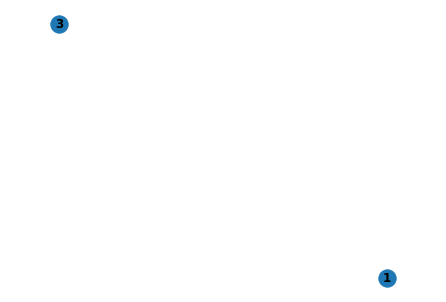

In [31]:
# non orienté
nx.draw(G, with_labels=True, font_weight='bold')
plt.savefig("simple_path.png") # save as png

C:\Users\Stephane\Anaconda3\I\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Stephane\Anaconda3\I\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


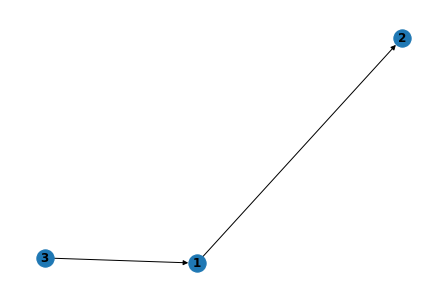

In [32]:
# orienté
nx.draw(DG, with_labels=True, font_weight='bold')

### <font color=#FEB229> 5. Deux exemples à scruter avec des générateurs de graphe</font> <a name="M25"></a>

In [33]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [34]:
G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

C:\Users\Stephane\Anaconda3\I\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Stephane\Anaconda3\I\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


### <font color=#FEB229> 6. (Exercice 2) Le karaté club de Zachary</font> <a name="M26"></a>

Ce sont des données recueillies auprès des membres d'un club universitaire de karaté par Wayne Zachary. La matrice 34X34 obtenue (voir le lien ci-dessous) représente la présence ou l'absence de liens entre les membres du club.

Zachary (1977) a utilisé ces données et un modèle de flux d'informations de résolution des conflits de réseau pour expliquer la scission de ce groupe à la suite de conflits entre les membres.

http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat

Modifier le code ci-dessous de telle sorte qu'il affiche le membre possédant le plus d'intéractions avec les autres membres.

In [35]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

nx.draw_circular(G, with_labels=True)
plt.show()

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


## <font color=#3876C2> Chapitre 3 - Chaîne de Markov</font> <a name="M3"></a>

### <font color=#FEB229> 1. Définitions</font> <a name="M31"></a>

![Définitions](markov.png)

Premier exemple relativement clair : http://www.jybaudot.fr/Probas/markov.html

 ### <font color=#FEB229> 2. K "piles" consécutifs </font> <a name="M32"></a>

![Exemple 1](ex1markov.png)

In [36]:
import numpy as np
from numpy import linalg


n= 100 # Nombre de lancers
K= 5   # La chaine s'arrete lorsqu'elle touche K

#----- On fabrique la matrice de transition -------- #
def MatriceTransition(K):
    Matrice=np.zeros((K+1,K+1))
    for k in range(K):
        Matrice[k,k+1]=0.5
        Matrice[k,0]=0.5
    Matrice[K,K]=1
    return Matrice

print("Matrice de transition pour K="+str(K)+" :")
print(MatriceTransition(K))

#---------- Calcul de la probabilite --------------- #
MatriceIteree=np.round(linalg.matrix_power(MatriceTransition(K),np.int(n)),4)  # Eleve la matrice a la puissance n, on arrondit
print("Matrice de transition pour K="+str(K)+" elevee a la puissance N="+str(n)+"")
print(MatriceIteree)
ProbaArrondie=MatriceIteree[0,K]                        # On extrait le bon coefficient
print("La probabilite d'avoir au moins "+str(K)+" piles consecutifs avec "+str(n)+" lancers est "+str(ProbaArrondie))

Matrice de transition pour K=5 :
[[0.5 0.5 0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0. ]
 [0.5 0.  0.  0.  0.5 0. ]
 [0.5 0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  1. ]]
Matrice de transition pour K=5 elevee a la puissance N=100
[[0.0966 0.0491 0.025  0.0127 0.0065 0.8101]
 [0.0933 0.0475 0.0241 0.0123 0.0062 0.8166]
 [0.0868 0.0442 0.0225 0.0114 0.0058 0.8293]
 [0.0741 0.0377 0.0192 0.0098 0.005  0.8543]
 [0.0491 0.025  0.0127 0.0065 0.0033 0.9034]
 [0.     0.     0.     0.     0.     1.    ]]
La probabilite d'avoir au moins 5 piles consecutifs avec 100 lancers est 0.8101


Phénomène de seuil

In [37]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

#----- On fabrique la matrice de transition -------- #


n= 400                              # Nombre de lancers
K= range(np.int(2.5*np.log2(n)))    # On prend K entre 0 et 2.5log(N)

ProbaAuMoinsk=[]
for k in K:
    MatriceIteree=linalg.matrix_power(MatriceTransition(k),np.int(n))
    ProbaAuMoinsk.append(MatriceIteree[0,k])

plt.plot(ProbaAuMoinsk,'o-')
plt.plot([np.log2(n),np.log2(n)],[0,1],'r--',label='Log_2('+str(n)+') ='+str(np.round(np.log2(n),2))+' ')
plt.xlabel('Entier $K$'),plt.ylabel('Probabilite'),plt.legend()
plt.title('Probabilite d obtenir au moins $K$ piles consecutifs avec '+str(n)+' lancers')
plt.show()

### <font color=#FEB229> 4. Temps d'attente dans une file d'attente en tandem</font> <a name="M33"></a>

On ne s'attardera pas sur l'aspect mathématiques de la situation qui n'est qu'un prétexte à la visualisation d'une chaîne de Markov. Mais pour les curieux : http://math.univ-lyon1.fr/~alachal/serveurOT/files_attente.pdf

Les états (arêtes du graphe) sont donnés par :

In [38]:
states = [(0, 0),
          (1, 0),
          (2, 0),
          (3, 0),
          (4, 0),
          (0, 1),
          (1, 1),
          (2, 1),
          (3, 1),
          (4, 1),
          (0, 2),
          (1, 2),
          (2, 2),
          (3, 2),
          (4, 2),
          (0, 3),
          (1, 3),
          (2, 3),
          (3, 3),
          (0, 4),
          (1, 4),
          (2, 4)]

Et la matrice de transition

In [39]:
Q = [[-5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1/2, -6, 5, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, -7, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, -7, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, -2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1/5, 0, 0, 0, 0, -26/5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1/5, 0, 0, 0, 1/2, -31/5, 5, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1/5, 0, 0, 0, 1, -36/5, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1/5, 0, 0, 0, 1, -36/5, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1/5, 0, 0, 0, 1, -11/5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 2/5, 0, 0, 0, 0, -27/5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -32/5, 5, 0, 0, 1/2, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1, -37/5, 5, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1, -37/5, 5, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1, -12/5, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 0, -27/5, 5, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -32/5, 5, 0, 1/2, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -32/5, 5, 0, 1/2, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, 1/2, -7/5, 0, 0, 1/2],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, -27/5, 5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, -27/5, 5],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/5, 0, 0, 0, -2/5]]

Construction du graphe networkx

In [40]:
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)


Maintenant on dessine la chaîne

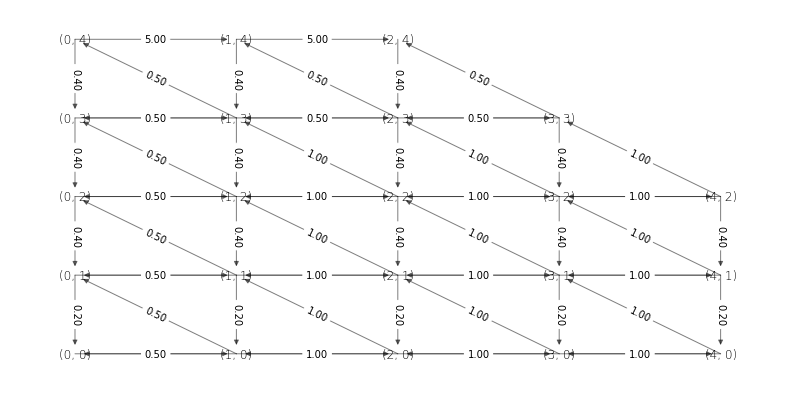

In [41]:
plt.figure(figsize=(14,7))
node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off');

## <font color=#3876C2> Chapitre 4 - Résolution de sudoku</font> <a name="M4"></a>

Pour ceux qui souhaitent éviter d'utilser le module numpy et préfèrent les listes de listes

### <font color=#FEB229> 1. Représentation des données</font> <a name="M41"></a>

In [42]:
import random

count = 0

On représente un problème de Sudoku par une matrice 9x9. Les cases inconnues sont remplies par des zéros. Ci-dessous deux problèmes faciles.

In [43]:
pb01 = [
 [0,3,0,0,6,0,1,0,5],
 [0,2,0,4,0,0,3,9,0],
 [0,0,7,0,3,0,4,0,0],
 [0,6,1,0,5,0,9,0,0],
 [8,0,2,7,0,6,5,0,1],
 [0,0,5,0,4,0,7,6,0],
 [0,0,4,0,8,0,2,0,0],
 [0,7,8,0,0,1,0,4,0],
 [2,0,3,0,7,0,0,5,0]]

In [44]:
pb02 = [
[0,6,9,2,0,7,4,0,0],
[0,0,1,9,0,0,0,0,0],
[2,0,0,0,0,0,0,6,0],
[0,1,0,6,0,0,9,0,0],
[7,0,0,1,0,2,0,0,4],
[0,0,5,0,0,3,0,7,0],
[0,2,0,0,0,0,0,0,6],
[0,0,0,0,0,4,3,0,0],
[0,0,4,5,0,1,7,9,0]
]

Les problèmes `harder` et `ai_escargot` ci-dessous sont réputés très difficiles. Voir [ce site](http://aisudoku.com/index_en.html). Nous allons voir que leur réputation est surfaite.

In [45]:
harder = [
[8,0,0,0,0,0,0,0,0],
[0,0,3,6,0,0,0,0,0],
[0,7,0,0,9,0,2,0,0],
[0,5,0,0,0,7,0,0,0],
[0,0,0,0,4,5,7,0,0],
[0,0,0,1,0,0,0,3,0],
[0,0,1,0,0,0,0,6,8],
[0,0,8,5,0,0,0,1,0],
[0,9,0,0,0,0,4,0,0]
]

In [46]:
ai_escargot = [
[1,0,0,0,0,7,0,9,0],
[0,3,0,0,2,0,0,0,8],
[0,0,9,6,0,0,5,0,0],
[0,0,5,3,0,0,9,0,0],
[0,1,0,0,8,0,0,0,2],
[6,0,0,0,0,4,0,0,0],
[3,0,0,0,0,0,0,1,0],
[0,4,0,0,0,0,0,0,7],
[0,0,7,0,0,0,3,0,0]
]

Rajoutons à cela le problème vide, qui n'est pas un vrai problème puisqu'il ne possède pas vraiment une unique solution.

In [47]:
vide = [
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0]
]

### <font color=#FEB229> 2. Conversions entre problèmes et grilles</font> <a name="M42"></a>

Lors de la résolution du problème on a besoin, pour chaque case, de mémoriser les possibilités pour remplir cette case. Nous appellerons dans la suite "grille" une matrice 9x9 contenant à la ligne $i$, colonne $j$ la liste des possibilités pour remplir la case $(i,j)$.

Voici une fonction qui permet de transformer un problème en grille. Tout d'abord, on remplit les cases de la grille par la liste des entiers de 1 à 9. Puis, pour chaque case connue du problème, on impose sa valeur dans la grille.

La fonction `imposer`, qui reste à écrire, force la case $(i, j)$ de la grille à une valeur $c$. Puis elle élimine de la ligne $i$, de la colonne $j$, et du carré 3x3 contenant la case $(i,j)$, la possibilité $c$. 

In [48]:
def probleme_vers_grille(probleme):
    g = 9 * [None]
    for k in range(9): g[k] = 9 * [None]
    for i in range(9):
        for j in range(9):
            g[i][j] = list(range(1, 10))
    for i in range(9):
        for j in range(9):
            c = probleme[i][j]
            if c != 0:
                imposer(g, i, j, c)
    return g

La fonction réciproque prend en paramètre une grille censée être résolue : toutes les cases de la grille contiennent des listes à 1 élément. Elle renvoie le problème correspondant. Elle lève une exception en cas de case de la grille qui n'est pas un singleton.

In [49]:
def grille_vers_probleme(g):
    pb = [[0 for i in range(9)] for j in range(9)]
    for i in range(9):
        for j in range(9):
            if len(g[i][j]) != 1: raise Exception
            else: pb[i][j] = g[i][j][0]
    return pb

### <font color=#FEB229> 3. Affichage</font> <a name="M43"></a>

La fonction `afficher_probleme` ... affiche correctement notre problème de Sudoku.

In [50]:
def afficher_probleme(pb):
    s = '' 
    for i in range(9):
        for j in range(9): s += ('%2d' % pb[i][j])
        if i != 8: s += '\n'
    print(s)

In [51]:
afficher_probleme(ai_escargot)

 1 0 0 0 0 7 0 9 0
 0 3 0 0 2 0 0 0 8
 0 0 9 6 0 0 5 0 0
 0 0 5 3 0 0 9 0 0
 0 1 0 0 8 0 0 0 2
 6 0 0 0 0 4 0 0 0
 3 0 0 0 0 0 0 1 0
 0 4 0 0 0 0 0 0 7
 0 0 7 0 0 0 3 0 0


### <font color=#FEB229> 4. (Exercice 3) Résolution</font> <a name="M44"></a>

### 4.1 La fonction de résolution

Nous y voilà. La fonction `resoudre` prend une grille $g$ en paramètre. 

- On commence par faire un peu de ménage en regardant les cases de la grille qui sont des singletons (ménage sur ligne, colonne, carré).
- Puis on choisit une case de la grille qui contient le moins possible d'éléments (le cas des singletons étant retenu en dernière extrémité).
- Si la case retenue est un singleton c'est que le problème est résolu.
- Si la case retenue est vide c'est que le problème est impossible.
- Sinon, on fait une copie toute neuve, $g_1$, de la grille $g$. On sélectionne une valeur $c$ au hasard parmi toutes les possibilités pour $g[i][j]$ et on l'impose dans $g_1$. On appelle ensuite récursivement `resoudre` sur $g_1$. Si cela réussit, tant mieux, on a fini. Sinon, on retire la possibilité $c$ pour la case $(i,j)$ de $g$ et on appelle résoudre sur le $g$ ainsi légèrement modifié.

**A vous de compléter le code de cette fonction**

In [52]:
def resoudre(g):
    global count
    count = count + 1
    for (i,j) in random_walk():
        if len(g[i][j]) == 1:
            c = g[i][j][0]
            imposer(g, i, j, c)
    i, j = choisir_case(g)
    if (i, j) == (-1, -1): return (g, True) # Grille résolue
    elif len(g[i][j]) == 0: return (g, False) # Grille impossible
    else:
        g1 = copie(g)
        c = choisir_hasard(g1[i][j])
        imposer(g1, i, j, c)
        (g2, b) = resoudre(g1)
        if not b: # échec ! 
            g[i][j].remove(c) # car c ne convient pas
            return resoudre(g)
        else:
            return (g2, True)

### 4.2 Copie d'une grille

Sans commentaire, voici la fonction de copie.

In [53]:
def copie(g):
    g1 = [[None for i in range(9)] for j in range(9)]
    for i in range(9):
        for j in range(9):
            g1[i][j] = g[i][j][:]
    return g1

### 4.3 Choix d'une case de la grille

La fonction `choisir_case` choisit une case de la grille ayant un nombre minimal d'éléments, mais si possible pas un seul. Elle renvoie les coordonnées de la case, sauf ti toutes les cases ont un seul élément (problème résolu !). Dans ce cas, la fonction renvoie le couple $(-1,-1)$. La grille est parcourue au hasard pour donner un peu plus de chance à la chance.

In [54]:
def random_list(n):
    s = list(range(n))
    for i in range(n):
        j = random.randint(0, i)
        s[i], s[j] = s[j], s[i]
    return s

In [55]:
print(random_list(81))

[66, 74, 44, 42, 67, 23, 58, 68, 12, 8, 5, 37, 7, 49, 14, 29, 43, 38, 15, 64, 16, 71, 13, 24, 50, 35, 46, 11, 76, 70, 75, 1, 27, 61, 62, 31, 69, 3, 6, 19, 57, 21, 79, 54, 26, 36, 63, 72, 4, 32, 78, 9, 60, 47, 25, 41, 20, 0, 73, 55, 17, 2, 45, 40, 56, 30, 33, 48, 53, 80, 65, 77, 28, 18, 10, 22, 51, 52, 34, 59, 39]


Voici une fonction qui renvoie un parcours au hasard des cases d'un tableau 9x9.

In [56]:
def random_walk():
    s = random_list(81)
    return [(x // 9, x % 9) for x in s]

In [57]:
print(random_walk())

[(7, 7), (5, 4), (8, 2), (0, 7), (7, 5), (3, 8), (0, 4), (6, 6), (1, 3), (7, 2), (2, 4), (6, 5), (6, 7), (3, 0), (6, 1), (4, 5), (8, 1), (0, 2), (8, 8), (1, 2), (4, 3), (4, 8), (3, 3), (8, 7), (0, 5), (5, 2), (6, 0), (2, 0), (3, 2), (7, 1), (0, 0), (7, 3), (4, 7), (5, 8), (8, 5), (6, 8), (4, 0), (8, 4), (1, 1), (0, 8), (1, 6), (1, 4), (5, 0), (7, 8), (5, 1), (1, 5), (5, 6), (1, 0), (3, 7), (0, 1), (5, 7), (2, 7), (4, 4), (4, 1), (6, 2), (1, 7), (7, 0), (8, 6), (7, 4), (3, 4), (2, 3), (3, 5), (7, 6), (3, 1), (8, 0), (4, 2), (5, 5), (8, 3), (1, 8), (4, 6), (0, 6), (2, 6), (6, 4), (3, 6), (2, 5), (2, 1), (2, 8), (2, 2), (5, 3), (6, 3), (0, 3)]


In [58]:
def note(g, i, j):
    l = len(g[i][j])
    if l == 1: return 1000000
    else : return l

In [59]:
def choisir_case(g):
    u, v = 0, 0
    for (i, j) in random_walk():
        nij = note(g, i, j)
        nuv = note(g, u, v)
        if nij <= nuv: u, v = i, j
    if note(g, u, v) == 1000000: u, v = -1, -1
    return (u, v)

Fonction ci-dessous : RAS :-)

In [60]:
def choisir_hasard(s):
    k = random.randint(0, len(s) - 1)
    return s[k]

In [61]:
choisir_hasard([1,7,2,8,5,3])

7

### 4.4 Imposer une valeur à une case

Dernière ligne droite : imposer une valeur à une case. Facile ...

In [62]:
def imposer(g, i, j, c):
    g[i][j] = [c]
    ajuster_ligne(g, i, j, c)
    ajuster_colonne(g, i, j, c)
    ajuster_carre(g, i, j, c)

... euh oui, facile lorsqu'on aura écrit les fonctions d'ajustement !

In [63]:
def ajuster_ligne(g, i, j, c):
    for k in range(9):
        if k != j and c in g[i][k]:
            g[i][k].remove(c)

In [64]:
def ajuster_colonne(g, i, j, c):
    for k in range(9):
        if k != i and c in g[k][j]:
            g[k][j].remove(c)

In [65]:
def ajuster_carre(g, i, j, c):
    for (k, l) in carre(i, j):
        if (k != i or l != j) and c in g[k][l]:
            g[k][l].remove(c)

In [66]:
def carre(i, j):
    coin_x = 3 * (i // 3)
    coin_y = 3 * (j // 3)
    return [(coin_x + k, coin_y + l) for k in range(3) for l in range(3)] 

### <font color=#FEB229> 5. Tests</font> <a name="M45"></a>

Nous sommes maintenant en mesure de tester notre fonction de résolution. Tant qu'à faire, on encapsule toutes les étapes dans une unique fonction que nous appellerons `solution`.

In [67]:
def solution(probleme):
    g = probleme_vers_grille(probleme)
    count = 0
    g1, b = resoudre(g)
    if not b:
        print("Pas de solution")
    else:
        afficher_probleme(grille_vers_probleme(g1))

On tente un problème facile ?

In [68]:
solution(pb01)

 4 3 9 8 6 2 1 7 5
 5 2 6 4 1 7 3 9 8
 1 8 7 9 3 5 4 2 6
 7 6 1 2 5 3 9 8 4
 8 4 2 7 9 6 5 3 1
 3 9 5 1 4 8 7 6 2
 6 5 4 3 8 9 2 1 7
 9 7 8 5 2 1 6 4 3
 2 1 3 6 7 4 8 5 9


Réponse donnée en 0 seconde. On essaie plus difficile ?

In [69]:
solution(pb02)

 8 6 9 2 1 7 4 3 5
 5 4 1 9 3 6 8 2 7
 2 7 3 4 5 8 1 6 9
 4 1 2 6 7 5 9 8 3
 7 3 8 1 9 2 6 5 4
 6 9 5 8 4 3 2 7 1
 1 2 7 3 8 9 5 4 6
 9 5 6 7 2 4 3 1 8
 3 8 4 5 6 1 7 9 2


Le problème ci-dessous est réputé difficile.

In [70]:
solution(harder)

 8 1 2 7 5 3 6 4 9
 9 4 3 6 8 2 1 7 5
 6 7 5 4 9 1 2 8 3
 1 5 4 2 3 7 8 9 6
 3 6 9 8 4 5 7 2 1
 2 8 7 1 6 9 5 3 4
 5 2 1 9 7 4 3 6 8
 4 3 8 5 2 6 9 1 7
 7 9 6 3 1 8 4 5 2


La solution est donnée en moins de 10 secondes, au pire. 

Selon [ce site](http://aisudoku.com/index_en.html), voici un problème vraiment très très difficile. Bof.

In [71]:
solution(ai_escargot)

 1 6 2 8 5 7 4 9 3
 5 3 4 1 2 9 6 7 8
 7 8 9 6 4 3 5 2 1
 4 7 5 3 1 2 9 8 6
 9 1 3 5 8 6 7 4 2
 6 2 8 7 9 4 1 3 5
 3 5 6 4 7 8 2 1 9
 2 4 1 9 3 5 8 6 7
 8 9 7 2 6 1 3 5 4


Difficile pour un humain ... mais pas pour python.

### <font color=#FEB229> 6. Derniers doutes levés</font> <a name="M46"></a>

La fonction `verifier` prend un problème en paramètre et sa solution (?) et teste si le problème est vraiment résolu.

In [72]:
def verifier(pb, sol):
    b = True
    comparer(pb, sol)
    for i in range(9): b = b and verifier_ligne(sol, i)
    for j in range(9): b = b and verifier_colonne(sol, j)
    for x in range(3):
        for y in range(3):
            b = b and verifier_carre(sol, x, y)
    return b

In [73]:
def comparer(pb, sol):
    b = True
    for i in range(9):
        for j in range(9):
            if pb[i][j] != 0:
                b = b and pb[i][j] == sol[i][j]
    return b            

In [74]:
def verifier_ligne(pb, i):
    s = 0
    for j in range(9):
        s = s + pb[i][j]
    return s == 45

In [75]:
def verifier_colonne(pb, j):
    s = 0
    for i in range(9):
        s = s + pb[i][j]
    return s == 45

In [76]:
def verifier_carre(pb, x, y):
    s = 0
    for i in range(3):
        for j in range(3):
            s = s + pb[3 * x + i][3 * y + j]
    return s == 45

In [77]:
def solution_verifiee(probleme):
    g = probleme_vers_grille(probleme)
    g1, b = resoudre(g)
    if not b:
        print("Pas de solution")
    else:
        sol = grille_vers_probleme(g1)
        afficher_probleme(sol)
        print('')
        if verifier(probleme, sol): print('Grille résolue !!!')
        else: print('Aie aie aie, l''impossible s''est produit.')
        

In [78]:
%%time
solution_verifiee(ai_escargot)

 1 6 2 8 5 7 4 9 3
 5 3 4 1 2 9 6 7 8
 7 8 9 6 4 3 5 2 1
 4 7 5 3 1 2 9 8 6
 9 1 3 5 8 6 7 4 2
 6 2 8 7 9 4 1 3 5
 3 5 6 4 7 8 2 1 9
 2 4 1 9 3 5 8 6 7
 8 9 7 2 6 1 3 5 4

Grille résolue !!!
Wall time: 45 ms


In [79]:
%%time
count = 0
solution_verifiee(harder)
print("Nombre d'appels à resoudre : ", count)

 8 1 2 7 5 3 6 4 9
 9 4 3 6 8 2 1 7 5
 6 7 5 4 9 1 2 8 3
 1 5 4 2 3 7 8 9 6
 3 6 9 8 4 5 7 2 1
 2 8 7 1 6 9 5 3 4
 5 2 1 9 7 4 3 6 8
 4 3 8 5 2 6 9 1 7
 7 9 6 3 1 8 4 5 2

Grille résolue !!!
Nombre d'appels à resoudre :  1433
Wall time: 1.13 s


### <font color=#FEB229> 7. (Exercice 4) Des milliers de grilles ...</font> <a name="M47"></a>

Le fichier joint `sudoku17.txt` contient 49151 problèmes de Sudoku avec 17 cases connues au départ. 17 est à ce jour le nombre minimum connu de cases nécessaires pour qu'un problème de Sudoku ait une solution unique. Il se peut qu'on trouve mieux un jour ...

Certains de ces problèmes donnent du fil à retordre à l'algorithme, le numéro 39949 par exemple (plus d'une minute de recherche pour obtenir la solution).

La fonction `get_sudoku` prend un entier $k$ en paramètre et renvoie le $k$ième problème du fichier.

**A vous de compléter le code de cette fonction**

In [80]:
def get_sudoku(k):
    lines = open('sudoku17.txt', 'r').readlines() 
    s = lines[k]
    pb = [[0 for i in range(9)] for j in range(9)]
    for i in range(9):
        for j in range(9):
            pb[i][j] = int(s[9*i+j])
    return pb

In [81]:
%%time
pb = get_sudoku(2018)
afficher_probleme(pb)
print()
solution_verifiee(pb)

 0 0 0 0 0 2 9 1 0
 3 2 0 0 8 0 0 0 0
 0 0 0 0 0 0 0 0 0
 0 1 9 0 0 0 5 0 0
 0 0 0 3 0 0 0 0 0
 0 0 0 0 7 0 0 0 0
 7 0 4 6 0 0 0 0 3
 0 0 0 0 0 1 0 0 0
 6 0 0 0 0 0 0 0 0

 8 4 7 5 3 2 9 1 6
 3 2 6 1 8 9 4 7 5
 1 9 5 4 6 7 3 8 2
 4 1 9 8 2 6 5 3 7
 5 7 8 3 1 4 2 6 9
 2 6 3 9 7 5 8 4 1
 7 5 4 6 9 8 1 2 3
 9 3 2 7 4 1 6 5 8
 6 8 1 2 5 3 7 9 4

Grille résolue !!!
Wall time: 3.39 s


La fonction `random_sudoku` renvoie un problème pris au hasard dans le fichier, ainsi que le numéro de ce problème.

In [82]:
def random_sudoku():
    k = random.randint(0, 49150)
    return (get_sudoku(k), k)

In [83]:
%%time
pb, k = random_sudoku()
print('Problème numéro ', k)
afficher_probleme(pb)
print()
solution_verifiee(pb)

Problème numéro  7875
 0 0 0 2 0 5 0 0 7
 0 9 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 4 0
 0 0 0 0 3 0 1 6 0
 2 0 0 8 0 0 0 0 0
 0 0 0 0 0 0 9 0 0
 4 6 0 0 1 0 0 0 0
 5 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0

 6 4 8 2 9 5 3 1 7
 7 9 1 3 4 8 2 5 6
 3 2 5 1 7 6 8 4 9
 8 7 4 9 3 2 1 6 5
 2 5 9 8 6 1 7 3 4
 1 3 6 4 5 7 9 2 8
 4 6 2 7 1 9 5 8 3
 5 1 7 6 8 3 4 9 2
 9 8 3 5 2 4 6 7 1

Grille résolue !!!
Wall time: 20.7 s
